### Run tests for warped p-variation

In [4]:
!python tests.py

number of warping paths to explore: 10
time to find all possible paths: 0.00
total time for brute force with DP sequentially: 0.03 s
total time for brute force with Alexey sequentiallys algo: 0.05 s


...
----------------------------------------------------------------------
Ran 3 tests in 16.461s

OK


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from generalized_dtw import Warp
from pvar_backend import *
from paths_tools import LatticePaths
from pvar_tools import *
from warping_pvar_dp import WarpingPvar
from transformers import *

In [2]:
# import sys, importlib
# importlib.reload(sys.modules['pvar_tools'])

# Example with simple signature p-variation

In [3]:
path = np.array([0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0])
path = AddTime().fit_transform([path])[0]

In [4]:
p_variation_path(path=path, p=1.5, depth=3, norm='l1')

(18.609853858712462, [0, 2, 4, 5, 7, 8])

In [5]:
p_variation_path_optim(path=path, p=1.5, depth=3, norm='l1')

(18.609853858712462, [0, 2, 4, 5, 7, 8])

# Example with signature p-variation distance

### We assume that $path_1$ and $path_2$ have already been aligned according to a warp

In [6]:
path1 = np.array([0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 6.43, 1.32, 23.1])
path2 = np.array([3.0, 1.0, 0.0, 2.0, 4.0, -1.0, 1.0, 3.0, -2.0, 4.21, 0.001, 10.])

path1 = AddTime().fit_transform([path1])[0]
path2 = AddTime().fit_transform([path2])[0]

In [7]:
d = p_variation_distance(path1, path2, p=1.5, depth=2, norm='l1')
d_optim = p_variation_distance_optim(path1, path2, p=1.5, depth=2, norm='l1')

print('distance with dynamic programming: {}'.format(d))
print('distance with optimisation algo: {}'.format(d_optim))

distance with dynamic programming: (296.9716167253778, [0, 2, 4, 5, 7, 11])
distance with optimisation algo: (296.9716167253778, [0, 2, 4, 5, 7, 11])


# Example with warped p-var package

In [8]:
path1 = np.array([0.0, 1.0, 2.0, 1.0, 4.0])
path2 = np.array([-3.0, 1.0, 0.0, 4.0, 2.0, 1.0])

path1 = AddTime().fit_transform([path1])[0]
path2 = AddTime().fit_transform([path2])[0]

### Compute the warped signature p-variation distance between $path_1$ and $path_2$

### 1) Sequential calculations

In [9]:
LP_seq = LatticePaths(path1, path2, p=1.5, depth=2, norm='l1', augment=False, add_time=False, brute_force=True, parallelise=False)

number of warping paths to explore: 126
time to find all possible paths: 0.05


Loop over all warps: 100%|██████████████████████████████████████████████████████████| 680/680 [00:02<00:00, 265.43it/s]


total time for brute force with DP sequentially: 2.57 s


### check output along one single warp

In [10]:
# example 1
warp = LP_seq.allPaths[3]

print(LP_seq.single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))
print(LP_seq.optim_single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))

(43.8798169977704, [0, 2, 6, 7, 9])
(43.74229167233559, [0, 2, 3, 6, 7, 9])


In [11]:
# example 2
warp = LP_seq.allPaths[7]

print(LP_seq.single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))
print(LP_seq.optim_single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))

(41.392522226814705, [0, 2, 6, 7, 9])
(41.250915020726076, [0, 2, 3, 6, 7, 8, 9])


### global answer

In [14]:
print('warping distance with dynamic programming: {} along {}'.format(LP_seq.warped_pvar, LP_seq.best_warp))
# print('warping distance with optimisation algo: {} along {}'.format(LP_seq.optim_warped_pvar, LP_seq.optim_best_warp))

warping distance with dynamic programming: 25.07518748871494 along [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (4, 3), (4, 4), (4, 5), (4, 5)]


### 2) Computations in parallel

In [13]:
LP = LatticePaths(path1, path2, p=1.5, depth=2, norm='l1', augment=False, add_time=False, brute_force=True, parallelise=True)

number of warping paths to explore: 126
time to find all possible paths: 0.04
Using all available cores, i.e. 4
total time for brute force with DP in Parallel: 2.94 s


In [15]:
print('warping distance with dynamic programming: {}'.format(LP.warped_pvar))
# print('warping distance with optimisation algo: {}'.format(LP.optim_warped_pvar))

warping distance with dynamic programming: 25.07518748871494


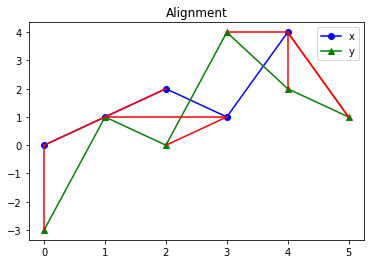

In [16]:
LP.plot_alignment()

# New!! Dynamic Programming warping signature p-variation distance

In [7]:
a = [1, 2, 3]

In [9]:
a.reverse()

In [4]:
idx = np.linspace(0, 6.28, 100)
x = np.sin(idx)
y = np.cos(idx)

In [5]:
x = AddTime().fit_transform([x])[0]
y = AddTime().fit_transform([y])[0]

In [6]:
W = WarpingPvar(x,y)

TypeError: list indices must be integers or slices, not tuple

# Generalized Dynamic Time Warping

### Example

In [4]:
idx = np.linspace(0, 6.28, 100)
x = np.sin(idx)
y = np.cos(idx)

In [5]:
dist = 'eucl'

if dist == 'eucl':
    # Euclidean
    d = lambda a, b: (a-b)**2
    f_d = lambda DD, a, b: np.sqrt(DD**2 + d(a, b))

elif dist == 'manh':
    # Manhattan
    d = lambda a, b : np.abs(a-b)
    f_d = lambda DD, a, b: DD + d(a,b)

else:
    # Minkowksi
    d = lambda a, b : np.abs(a-b)
    f_d = lambda DD, a, b: max(DD, d(a,b))

In [6]:
W = Warp(x,y,d,f_d)

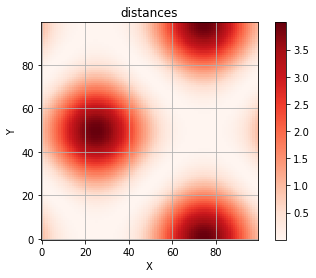

In [7]:
W.distance_cost_plot(W.pairwise_distances())

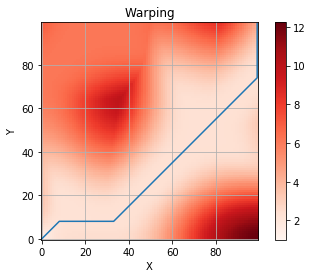

In [8]:
W.plot_lattice()

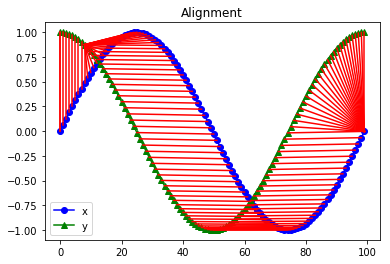

In [9]:
W.plot_alignment()